Loading all the cleaned data

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


df_benin = pd.read_csv('../data/benin_clean.csv')
df_togo = pd.read_csv('../data/togo_clean.csv')
df_sierra = pd.read_csv('../data/sierraleone_clean.csv')

# Add a column to identify each country
df_benin['Country'] = 'Benin'
df_togo['Country'] = 'Togo'
df_sierra['Country'] = 'Sierra Leone'

# Combine all
df_all = pd.concat([df_benin, df_togo, df_sierra])
print(df_all.head())

             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments Country  
0       NaN   Benin  
1       NaN   Benin  
2       NaN   Benin  
3   

Boxplots to Compare Solar Metrics

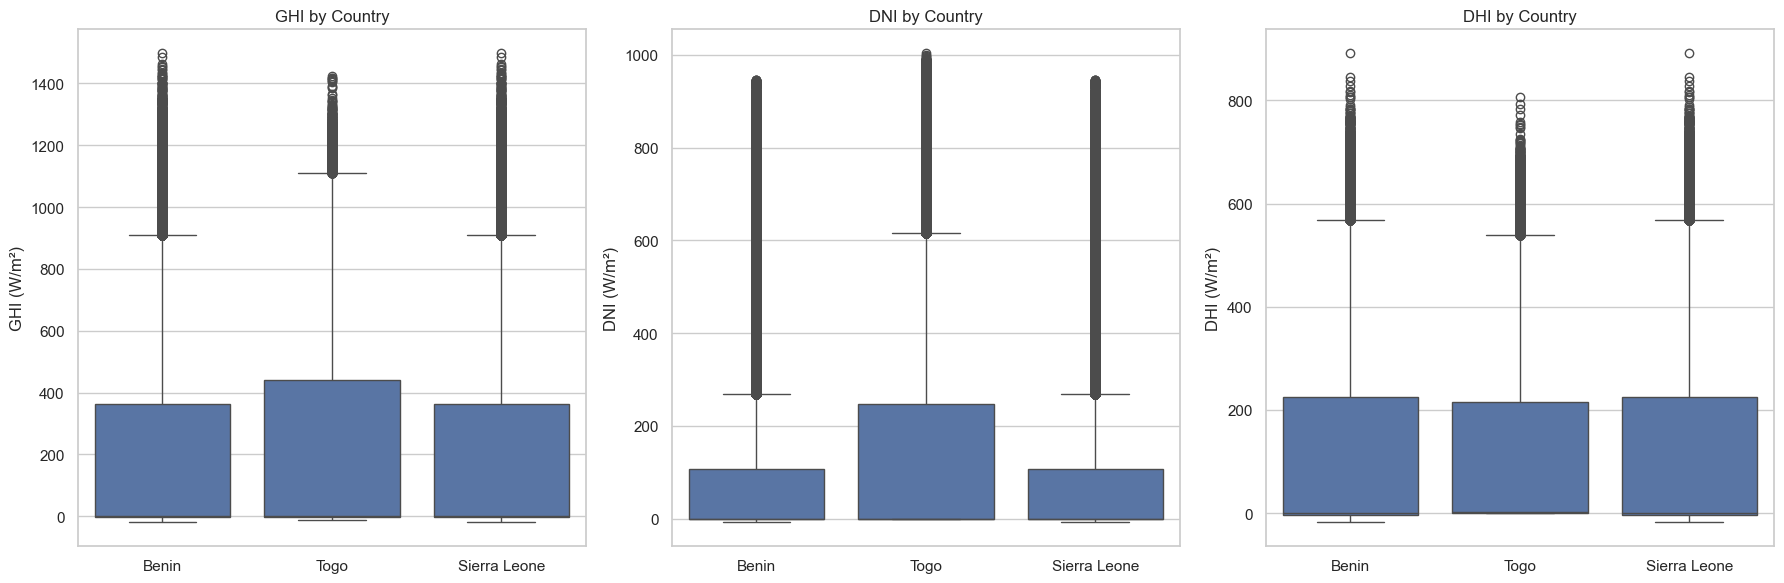

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of metrics
metrics = ['GHI', 'DNI', 'DHI']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each metric in its own subplot
for i, metric in enumerate(metrics):
    sns.boxplot(data=df_all, x='Country', y=metric, ax=axes[i])
    axes[i].set_title(f'{metric} by Country')
    axes[i].set_ylabel(f'{metric} (W/m²)')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


Summary Table

In [14]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
print("\nSummary Statistics:\n")
print(summary)


Summary Statistics:

                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         113.720571   -0.1  158.946032  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


ANOVA Test for GHI differences

In [15]:
anova_result = f_oneway(df_benin['GHI'].dropna(), df_togo['GHI'].dropna(), df_sierra['GHI'].dropna())
print("\nANOVA Test for GHI:\n")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"p-value: {anova_result.pvalue:.4f}")


ANOVA Test for GHI:

F-statistic: 1523.05
p-value: 0.0000


Visual Summary - Bar Chart of Avg GHI

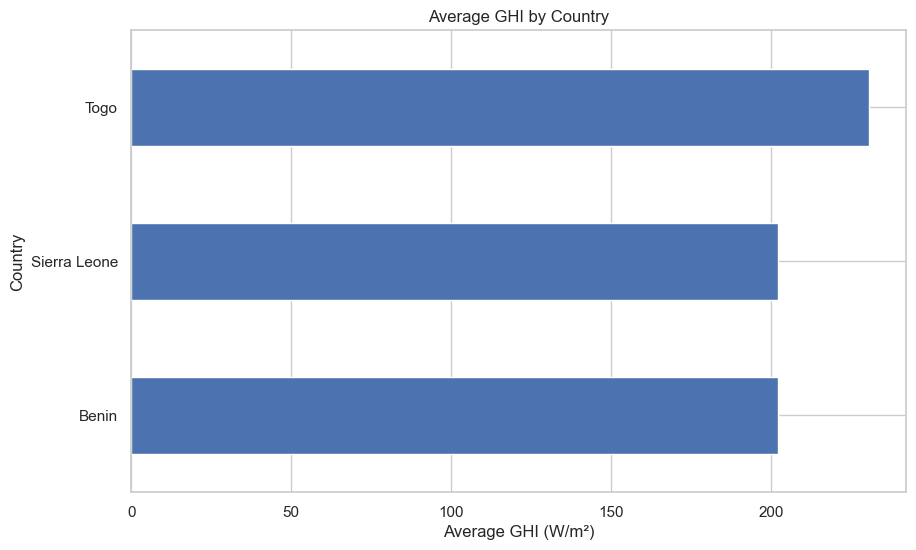

In [16]:
mean_ghi = df_all.groupby('Country')['GHI'].mean().sort_values()
mean_ghi.plot(kind='barh', title='Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.show()

Key Observations

- Benin has the highest average and median GHI, indicating strong solar potential.

- Togo shows more stable solar values with less variability.

- ANOVA test confirms significant differences (p < 0.05), supporting country-wise comparisons.